<a href="https://colab.research.google.com/github/gokulrejith/NeuralNetwork/blob/master/kerasANNc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Neural Network (ANN) - Keras**

Import Numerical python (Numpy) & Pandas for loading and manipulating data

In [ ]:
import numpy as np
import pandas as pd

Load the dataset and show data stats

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/MobileData.csv") 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
pd.set_option('display.max_columns', None) # To show all columns
dataset.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0


In the above dataset the aim is to predict the price range in which mobiles lie. So ***price_range*** is the target variable and all others are predictor variables. Prices are classified as 0,1,2,3 in this dataset.
|| 0 (low cost)
1 (medium cost)
2 (high cost)
3 (very high cost) ||
So, this is a Multivariate classification problem.

Changing pandas dataframe to numpy array and selecting columns (X contains features i.e. predictor variables and y contains the target variables)

In [ ]:
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

##Data Visualizaion & Preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


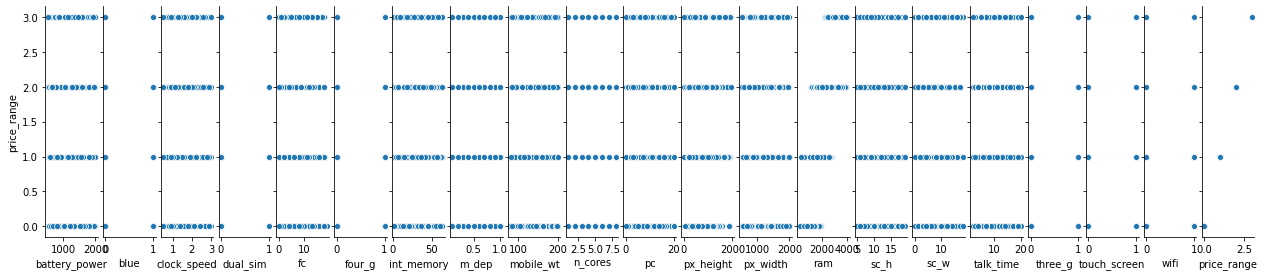

In [ ]:
# visualize the relationship between the features and classes using scatterplots
import seaborn as sns
g = sns.pairplot(dataset, x_vars= list(dataset.columns), y_vars='price_range')
g.fig.set_size_inches(17,4)

Checking and removing outliers (if any) —> By Z score method || Z score = (x -mean) / std. deviation || If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
For example, in a survey, it was asked how many children a person had.
Suppose the data obtained from people is:

1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2

![alt text](https://www.bmj.com/sites/default/files/attachments/resources/2011/08/fig-27.jpg)

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(dataset))
print(z)

[[0.90259726 0.9900495  0.83077942 ... 1.00601811 0.98609664 0.4472136 ]
 [0.49513857 1.0100505  1.2530642  ... 0.99401789 1.01409939 0.4472136 ]
 [1.5376865  1.0100505  1.2530642  ... 0.99401789 1.01409939 0.4472136 ]
 ...
 [1.53077336 0.9900495  0.76274805 ... 0.99401789 1.01409939 1.34164079]
 [0.62252745 0.9900495  0.76274805 ... 0.99401789 0.98609664 1.34164079]
 [1.65833069 1.0100505  0.58562134 ... 0.99401789 0.98609664 1.34164079]]


In [ ]:
print(np.where(z > 3))

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
       1888]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]))


In [ ]:
datasetNew = dataset[(z < 3).all(axis=1)]

In [ ]:
print(dataset.shape)
print(datasetNew.shape)

(2000, 21)
(1988, 21)


In [ ]:
X = datasetNew.iloc[:,:20].values #Redefining X & y
y = datasetNew.iloc[:,20:21].values

Checking whether all classes are balanced




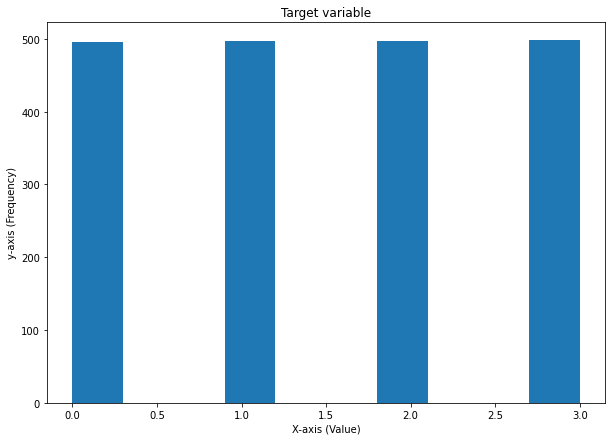

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(y) 
plt.xlabel("X-axis (Value)") 
plt.ylabel("y-axis (Frequency)")
plt.title('Target variable') 
plt.show()

Checking whether predictor variables (X) needs to be **standardized**

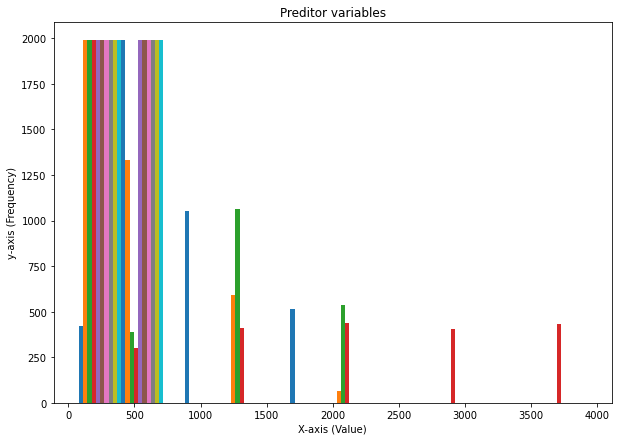

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(X , bins = 5) 
plt.xlabel("X-axis (Value)") 
plt.ylabel("y-axis (Frequency)")
plt.title('Preditor variables') 
plt.show()

From the histogram we can see that the values lie in various ranges. So we need to bring all the values into a particular range without distorting the differences in the range of values. Standardization can also improve accuracy. Also algorithms like gradient descent can converge much faster if standardization is done.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

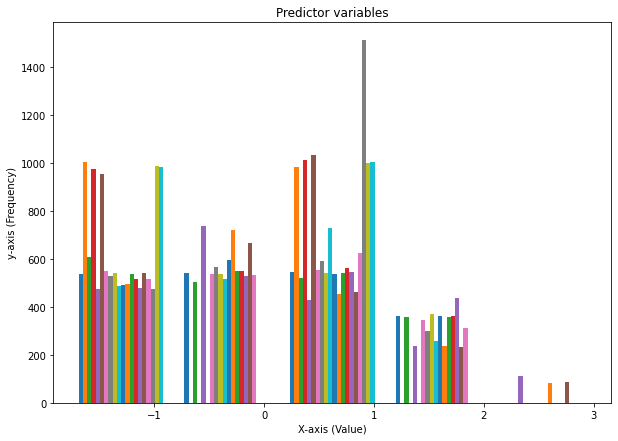

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(X, bins = 5) 
plt.xlabel("X-axis (Value)") 
plt.ylabel("y-axis (Frequency)")
plt.title('Predictor variables') 
plt.show()

**One Hot Encoding** - It is a process to convert integer classes into binary values. Our dataset has 4 classes in 0, 1, 2, 3. Now we cannot directly feed this to neural network so we convert it in the form of binary.
We can do this using a function in sklearn:

In [ ]:
print(y) #Initial Values (Before OHE)
print(type(y))
print(y.shape)

[[1]
 [2]
 [2]
 ...
 [3]
 [0]
 [3]]
<class 'numpy.ndarray'>
(1988, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y) #After One Hot Encoding
print(type(y))
print(y.shape)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
<class 'numpy.ndarray'>
(1988, 4)


Now there is one unique binary value for the class. The new array formed will be of shape (n, number of classes), where n is the number of samples in our dataset.

Splitting data into test and train in the ratio of 1:9

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

Defining the Model and training

In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.

In [ ]:
#import os
#os.environ["KERAS_BACKEND"] = "theano"
import keras
#import keras.backend
from keras.models import Sequential
from keras.layers import Dense
#if keras.backend.backend() != 'theano':
#    print("Using TensorFlow backend.")
#else:
#    print("Using Theano backend.")

Using TensorFlow backend.


**2 hidden layers of dimensions 12**

 A Deep Neural Network (DNN) commonly has between 2-8 layers of neurons.



In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

![Meet Softmax](https://miro.medium.com/max/875/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg)

In [ ]:
!pip install ann_visualizer
!pip install graphviz
from ann_visualizer.visualize import ann_viz
ann_viz(model, view = True, filename="network.gv", title="Shape of your Neural Network")
print("\033[1m \033[92m Model graphed. Click on the Navigation menu & download \n(For mobile users click on File Browser in the Navigation)\n \033[31m'network.gv.pdf' \033[92mto visualize how our Neural Network looks like.")
model.summary()

  Model graphed. Click on the Navigation menu & download 
(For mobile users click on File Browser in the Navigation)
 'network.gv.pdf' to visualize how our Neural Network looks like.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 52        
Total params: 460
Trainable params: 460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Initial weights (Set Randomly)**

In [ ]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())

{'name': 'dense_5', 'trainable': True, 'batch_input_shape': (None, 20), 'dtype': 'float32', 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.03152937, -0.30365688, -0.28019652,  0.4217852 , -0.3937523 ,
         0.02583012, -0.10122699,  0.40779355,  0.21944234,  0.23239234,
         0.3458921 , -0.2649508 ],
       [-0.2427555 , -0.40098882, -0.374796  ,  0.01679203, -0.31059554,
        -0.05012766,  0.3124008 ,  0.07903954,  0.04319924,  0.07985553,
         0.06895718, -0.05695769],
       [ 0.40941778, -0.04589012, -0.39698428,  0.37411854, -0.29831782,
        -0.29479596,  0.18641743, -0.00654799, -0.23179139, -0.21876664,
        

In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=320, batch_size=64)

Train on 1789 samples, validate on 199 samples
Epoch 1/320
1789/1789 [==============================] - 0s 70us/step - loss: 1.6480 - accuracy: 0.2482 - val_loss: 1.6270 - val_accuracy: 0.2261
Epoch 2/320
1789/1789 [==============================] - 0s 20us/step - loss: 1.4736 - accuracy: 0.2610 - val_loss: 1.4792 - val_accuracy: 0.2714
Epoch 3/320
1789/1789 [==============================] - 0s 21us/step - loss: 1.3900 - accuracy: 0.2862 - val_loss: 1.4047 - val_accuracy: 0.3367
Epoch 4/320
1789/1789 [==============================] - 0s 21us/step - loss: 1.3377 - accuracy: 0.3287 - val_loss: 1.3505 - val_accuracy: 0.3518
Epoch 5/320
1789/1789 [==============================] - 0s 21us/step - loss: 1.2947 - accuracy: 0.3594 - val_loss: 1.3009 - val_accuracy: 0.3568
Epoch 6/320
1789/1789 [==============================] - 0s 21us/step - loss: 1.2535 - accuracy: 0.3963 - val_loss: 1.2509 - val_accuracy: 0.4020
Epoch 7/320
1789/1789 [==============================] - 0s 22us/step - loss:

If the test set is locked away, but you still want to measure performance on unseen data as a way of selecting a good hypothesis, then divide the available data (without the test set) into a training set and a validation set.

**Look at the optimized weights!**

In [ ]:
for layer in model.layers: 
  print(layer.get_config(), layer.get_weights())

{'name': 'dense_5', 'trainable': True, 'batch_input_shape': (None, 20), 'dtype': 'float32', 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 1.93077266e-01, -3.49520802e-01,  2.28680566e-01,
         2.49495074e-01, -7.40822136e-01, -1.91622321e-02,
         2.49960139e-01,  6.72497451e-01,  7.98730969e-01,
         2.15712145e-01, -4.05130655e-01, -6.09054148e-01],
       [-1.40114486e-01, -5.46588786e-02, -1.68889850e-01,
        -3.64974350e-01, -1.96157545e-01,  1.75504863e-01,
        -4.08922434e-02,  1.20362490e-01,  1.08710632e-01,
         1.42387450e-02,  4.81135100e-02,  2.87223786e-01],
       [ 4.41681683e-01, -2.33867258e-01, 

Inverse One Hot Encoding

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy:', a*100)

Accuracy: 93.96984924623115


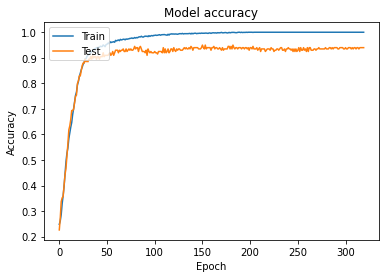

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

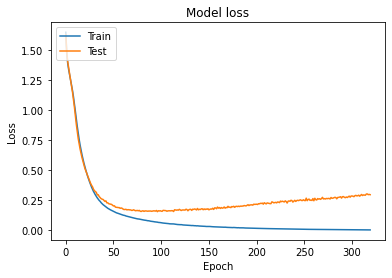

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Confusion Matrix

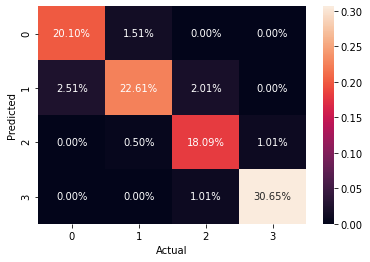

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test, pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
ax.set(xlabel='Actual', ylabel='Predicted')
plt.show()

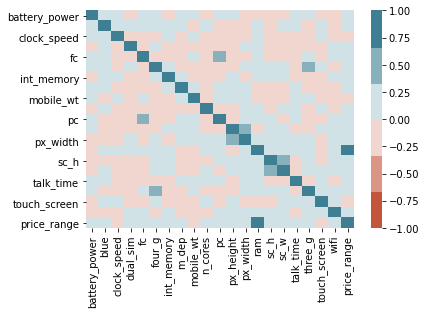

In [ ]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90
);

In [ ]:
Xnew = np.array([[1456,0,1.6,1,5,0,49,0.2,193,3,20,1285,1427,3624,12,11,16,1,1,0]])
ynew = model.predict_classes(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0])) 

X=[1.456e+03 0.000e+00 1.600e+00 1.000e+00 5.000e+00 0.000e+00 4.900e+01
 2.000e-01 1.930e+02 3.000e+00 2.000e+01 1.285e+03 1.427e+03 3.624e+03
 1.200e+01 1.100e+01 1.600e+01 1.000e+00 1.000e+00 0.000e+00], Predicted=3
